<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/Computational-Methods-In-Material-Science/blob/main/MonteCarlo_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from random import random

In [2]:
plt.rc("font", size=15)

In [3]:
#6-style
cols6 = ["#4477AA", "#66CCEE", "#228833", "#CC8844", "#CC6677", "#888888", '#64C204']
cols4 = ["#332288", "#44AA99", "#999933", "#882255", "#FFCC66"]
cols1 = ['darkgray', 'lightgray', 'indianred', 'mistyrose', 'darkred', 'crimson']
cols10 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [4]:
#analytical solution (area of a circle)

def circlearea(r):
    area = np.pi*r**2
    return area

In [5]:
#result_analytical
r = 1
circlearea(r)

3.141592653589793

In [6]:
##Approach1 - Using Grids

In [7]:
gridsize = 0.001
start = -1
stop = 1
grid = np.arange(start,stop+gridsize,gridsize)

count=[]

tstart=time.time()
for x in grid:
    for y in grid:
        dist = np.sqrt(x**2+y**2)
        if dist <=1.:
            count.append(1)

area_sq = 4*r**2

n_grid = len(grid)**2

area = (len(count)/n_grid)*4*r**2

print("Area using grid approach=", area)
print("analytical=", circlearea(r))
print("error=", abs(circlearea(r)-area))

Area using grid approach= 3.1383898255769664
analytical= 3.141592653589793
error= 0.003202828012826675


In [8]:
## Time the approach and see how error (and run-time) changes with grid size
start = -1
stop= 1
# gridsizes =np.array([0.2, 0.1, 0.02, 0.01, 0.002, 0.001, 0.0005, 0.0003, 0.0002])
gridsizes =np.array([0.2, 0.1, 0.02, 0.01, 0.002, 0.001])

listerror = []
listduration = []
listgridlen = []
for size in gridsizes:
    grid = np.arange(start,stop+size,size)

    count=[]
    tstart=time.time()
    for x in grid:
        for y in grid:
            dist = np.sqrt(x**2+y**2)
            if dist <=1.:
                count.append(1)

    tstop=time.time()
    duration = tstop-tstart
    n_grid = len(grid)**2
    area = (len(count)/n_grid)*4*r**2
    error = abs(circlearea(r)-area)
    listerror.append(error)
    listduration.append(duration)
    listgridlen.append(len(grid))


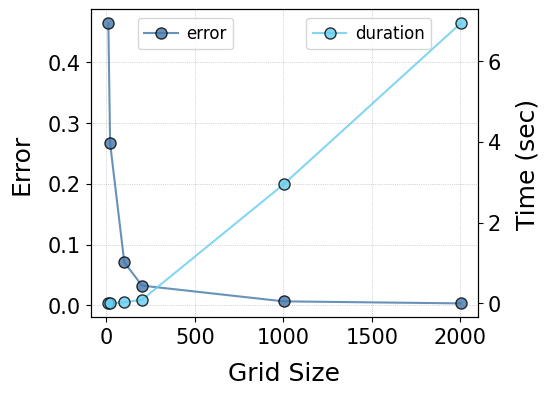

In [9]:
## Plot the outcomes
fig, ax = plt.subplots(figsize=(5, 4))

x1 = listgridlen
y1 = listduration
y2 = listerror

ax.plot(x1, y2, marker='o', ls='-', ms=8, mec='k', mew=1, alpha= 0.8, color=cols6[0], label='error')
ax.grid(True, linestyle=':', linewidth=0.5)

ax.set_xlabel('Grid Size', fontsize=18, labelpad=10)
ax.set_ylabel('Error', fontsize=18, labelpad=10)

#ax.set_ylim(-0.001, 0.01)
#ax.set_xlim()

ax2 = ax.twinx()
ax2.plot(x1, y1, marker='o', ls='-', ms=8, mec='k', mew=1, alpha= 0.8, color=cols6[1], label='duration')

ax2.set_ylabel('Time (sec)', fontsize=18, labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(0.1, 1.),
          fontsize=12, numpoints=1, handletextpad=0.5)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, bbox_to_anchor=(0.9, 1.),
          fontsize=12
           , numpoints=1, handletextpad=0.5)

plt.show()

In [10]:
## Approach 2 - Monte Carlo Integration

In [11]:
points_in = []

no_points = 10000

for i in range(no_points):
    x=2*random()-1
    y=2*random()-1
    if np.sqrt(x**2+y**2)<=1.:
        points_in.append(1)

area_sq = 4*r**2
area_app2 = (len(points_in)/float(no_points))*area_sq

print("Area using Monte Carlo Apporach=", area_app2)
print("analytical=", circlearea(r))
print("error=", abs(circlearea(r)-area_app2))

Area using Monte Carlo Apporach= 3.1608
analytical= 3.141592653589793
error= 0.019207346410206938


In [12]:
# points_array = np.array([1000, 10000, 100000, 500000, 1000000, 5000000, 10000000])
points_array = np.array([1000, 10000, 100000, 500000, 1000000])

listerror2 = []
listduration2 = []
listpoints = []

for no_points in points_array:
    points_in = []

    t2start=time.time()
    for i in range(no_points):
        x=2*random()-1
        y=2*random()-1
        if np.sqrt(x**2+y**2)<=1.:
            points_in.append(1)

    t2stop=time.time()
    duration2 =t2stop-t2start
    area_sq = 4*r**2
    area_app2 = (len(points_in)/float(no_points))*area_sq
    error2 = abs(circlearea(r)-area_app2)

    listerror2.append(error2)
    listduration2.append(duration2)
    listpoints.append(no_points)

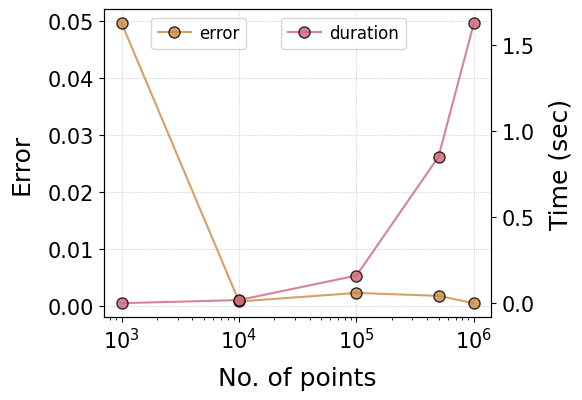

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))

a1 = listpoints
b1 = listduration2
b2 = listerror2

ax.plot(a1, b2, marker='o', ls='-', ms=8, mec='k', mew=1, alpha= 0.8, color=cols6[3], label='error')
ax.grid(True, linestyle=':', linewidth=0.5)

ax.set_xlabel('No. of points', fontsize=18, labelpad=10)
ax.set_ylabel('Error', fontsize=18, labelpad=10)

#ax.set_ylim(-0.001, 0.01)
#ax.set_xlim(0, 1000000)
ax.set_xscale('log')

ax2 = ax.twinx()
ax2.plot(a1, b1, marker='o', ls='-', ms=8, mec='k', mew=1, alpha= 0.8, color=cols6[4], label='duration')

ax2.set_ylabel('Time (sec)', fontsize=18, labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(0.1, 1.),
          fontsize=12, numpoints=1, handletextpad=0.5)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, bbox_to_anchor=(0.8, 1.),
          fontsize=12
           , numpoints=1, handletextpad=0.5)

plt.show()

In [14]:
x = np.linspace(0.01,10,100)
x2 = np.linspace(4,6,100)

In [15]:
def f(x):
    return 0.25*x**2

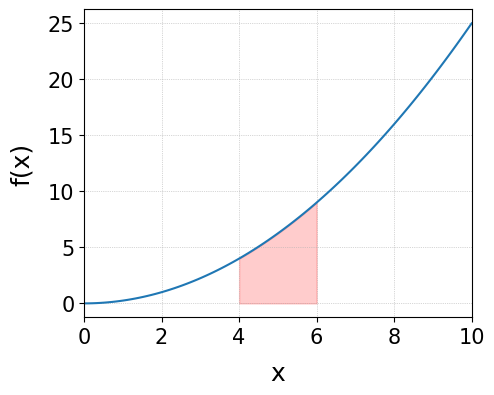

In [16]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(x,f(x))

ax.set_xlim(0, 10)

ax.grid(True, linestyle=':', linewidth=0.5)
ax.fill_between(x2, f(x2), 0, color='red', alpha=0.2)

ax.set_ylabel('f(x)', fontsize=18, labelpad=10)
ax.set_xlabel('x', fontsize=18, labelpad=10)

plt.show()

In [17]:
## Integrate f(x) for x in [2,4] using Monte Carlo Integration
points_in = []

no_points = 1000000

for i in range(no_points):
    x=2*random()+4
    y=9*random()
    if y<=f(x):
        points_in.append(1)

area_rect = 2.*9.
area_app = (len(points_in)/float(no_points))*area_rect

integral = (0.25*(6.**3 - 4.**3))/3.0

print("Area using Monte Carlo Apporach=", area_app)
print("analytical=", integral)
print("error=", abs(integral-area_app))

Area using Monte Carlo Apporach= 12.667914
analytical= 12.666666666666666
error= 0.0012473333333336


In [18]:
## Check the integration using scipy quadrature
import scipy.integrate as spi
integrand = lambda x : 0.25*x**2
a = 4.
b = 6.
result, error = spi.quad(integrand, a, b)
print('Result is ', result, 'with error ', error)

Result is  12.666666666666668 with error  1.4062824978585317e-13


### Interested in learning scipy. Check out these nice lectures:
https://lectures.scientific-python.org

####  There could be much efficient ways to code the Monte Carlo Integration, paticularly without using for loop. I will leave up to you to figure them out

In [19]:
import numpy as np

def monte_carlo_circle_area(num_points):
  """Calculates the area of a unit circle using Monte Carlo integration."""
  # Generate random points within a square of side 2 centered at the origin
  x = 2 * np.random.rand(num_points) - 1
  y = 2 * np.random.rand(num_points) - 1

  # Calculate the distances of the points from the origin
  distances = np.sqrt(x**2 + y**2)

  # Count the points that fall inside the circle
  points_inside_circle = np.count_nonzero(distances <= 1)

  # Estimate the area of the circle
  area = 4 * (points_inside_circle / num_points)
  return area

# Example usage
num_points = 100000
estimated_area = monte_carlo_circle_area(num_points)
print(f"Estimated area of the unit circle: {estimated_area}")

Estimated area of the unit circle: 3.13852


In [20]:
import numpy as np

def monte_carlo_circle_area(num_points):
  """Calculates the area of a unit circle using Monte Carlo integration."""
  # Generate random points within a square of side 2 centered at the origin
  x = 2 * np.random.rand(num_points) - 1
  y = 2 * np.random.rand(num_points) - 1

  # Calculate the distances of the points from the origin
  distances = np.sqrt(x**2 + y**2)

  # Create a Boolean mask to select points inside the circle
  inside_circle_mask = distances <= 1

  # Estimate the area of the circle
  area = 4 * (np.sum(inside_circle_mask) / num_points)
  return area

# Example usage
num_points = 100000
estimated_area = monte_carlo_circle_area(num_points)
print(f"Estimated area of the unit circle: {estimated_area}")

Estimated area of the unit circle: 3.14088
